# Chapter 8. Predicting the likelihood of marketing engagement

Predictive analytics is a process of analyzing and extracting information from historical data to identify patterns and make predictions about future outcomes

For example, it is often used in the financial industry for fraud detection, where machine learning models are trained to detect and prevent potential fraudulent transactions. The healthcare industry can also benefit from predictive analytics to help physicians in their decision-making processes. Furthermore, there are various parts of marketing that can also benefit from predictive analytics, such as customer acquisition, customer retention, and up-selling and cross-selling, to name a few.

**Types:**
1. Classification problems: A classification problem is where there is a set of categories an observation can belong to. For example, predicting whether a customer is going to open a marketing email or not is a classification problem. There are only two possible outcomes — opening the marketing email or not opening the email.
2. Regression problems: A regression problem, on the other hand, is where the outcome can take on any range of real numbers. For example, predicting customer lifetime value is a regression problem. One customer can have a lifetime value of 0 and another customer can have a lifetime value of 10,000. This type of problem, where the outcome can take continuous values, is called a regression problem

## 8.1 Predictive analytics in marketing 

### Applications of predictive analytics in marketing 

**Likelihood of engagement**: Predictive analytics can help marketers forecast the likelihood of customer engagements with their marketing strategies. For example, if your marketing happens a lot in the email space, you can utilize predictive analytics to forecast which customers have a high likelihood of opening your marketing emails and custom-tailor your marketing strategies to those high-likelihood customers to maximize your marketing results. For another example, if you are displaying advertisements on social media, predictive analytics can help you identify certain types of customers that are likely to click on the ads.

**Customer lifetime value**: Predictive analytics can help you forecast the expected lifetime values of your customers. Using historical transactional data, predictive analytics can help you identify high value customers within your customer base. With these predictions, you and your firm can focus more on building healthy relationships with those high-value customers. 

**Recommending the right products and contents**: We can use data science and machine learning to predict which customers are likely to purchase products or view contents. Using these predictions, you can improve customer conversion rates by recommending the right products and contents for individual customers

**Customer acquisition and retention**: Predictive analytics has also been heavily used for customer acquisition and retention. Based on the profile data you gathered about your prospects or leads and the historical data of your existing customers, you can apply predictive analytics to identify high-quality leads or rank the leads by their likelihood of being converted into active customers. On the other hand, you can use the customer churn data and the historical data of your existing customers to develop predictive models to forecast which customers are likely to leave or unsubscribe from your products. 

## 8.2 Evaluating classification models

Accuracy = Number of correct predictions / Total number of records

Precision = TP / (TP + FP)

Recall = TP / (TP + FN)

ROC and AUC

## 8.3 Predicting the likelihood of marketing engagement with python

In [15]:
import pandas as pd
df = pd.read_csv('/Users/boyuan/Desktop/OneDrive/Hands on data science for martketing/WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv')
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


### Variable encoding 

#### Response variable encoding 

In [16]:
df['Engaged'] = df['Response'].apply(lambda x: 1 if x == 'Yes' else 0)

In [17]:
df['Engaged'].mean()

0.14320122618786948

#### Categorical variable encoding 

In [18]:
columns_to_encode = [
    'Sales Channel', 'Vehicle Size', 'Vehicle Class', 'Policy', 'Policy Type',
    'EmploymentStatus', 'Marital Status', 'Education', 'Coverage'
]

In [19]:
categorical_features = []
for col in columns_to_encode:
    encoded_df = pd.get_dummies(df[col])
    encoded_df.columns = [col.replace(' ', '.') + '.' + x for x in encoded_df.columns]
    categorical_features += list(encoded_df.columns)
    df = pd.concat([df, encoded_df], axis=1)

In [20]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Marital.Status.Married,Marital.Status.Single,Education.Bachelor,Education.College,Education.Doctor,Education.High School or Below,Education.Master,Coverage.Basic,Coverage.Extended,Coverage.Premium
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,1,0,1,0,0,0,0,1,0,0
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,0,1,1,0,0,0,0,0,1,0
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,1,0,1,0,0,0,0,0,0,1
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,1,0,1,0,0,0,0,1,0,0
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,0,1,1,0,0,0,0,1,0,0


In [21]:
df['Is.Female'] = df['Gender'].apply(lambda x: 1 if x == 'F' else 0)
categorical_features.append('Is.Female')

### Building predictive models

In [23]:
continuous_features = [
    'Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
    'Months Since Last Claim', 'Months Since Policy Inception',
    'Number of Open Complaints', 'Number of Policies', 'Total Claim Amount'
]

all_features = continuous_features + categorical_features
response = 'Engaged'

sample_df = df[all_features + [response]]
sample_df.columns = [x.replace(' ', '.') for x in sample_df.columns]
all_features = [x.replace(' ', '.') for x in all_features]

sample_df.head()

,Customer.Lifetime.Value,Income,Monthly.Premium.Auto,Months.Since.Last.Claim,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Total.Claim.Amount,Sales.Channel.Agent,Sales.Channel.Branch,...,Education.Bachelor,Education.College,Education.Doctor,Education.High.School.or.Below,Education.Master,Coverage.Basic,Coverage.Extended,Coverage.Premium,Is.Female,Engaged
0,2763.519279,56274,69,32,5,0,1,384.811147,1,0,...,1,0,0,0,0,1,0,0,1,0
1,6979.535903,0,94,13,42,0,8,1131.464935,1,0,...,1,0,0,0,0,0,1,0,1,0
2,12887.431650,48767,108,18,38,0,2,566.472247,1,0,...,1,0,0,0,0,0,0,1,1,0
3,7645.861827,0,106,18,65,0,7,529.881344,0,0,...,1,0,0,0,0,1,0,0,0,0
4,2813.692575,43836,73,12,44,0,1,138.130879,1,0,...,1,0,0,0,0,1,0,0,0,0


In [24]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(sample_df[all_features], sample_df[response], test_size = 0.3)

In [25]:
sample_df.shape

(9134, 51)

In [27]:
x_train.shape

(6393, 50)

In [28]:
x_test.shape

(2741, 50)

#### Random forest model

In [30]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()

#### Training a random forest model

In [31]:
rf_model = RandomForestClassifier(
    n_estimators = 200,
    max_depth = 5
)
rf_model.fit(X = x_train, y = y_train)
rf_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [34]:
rf_model.estimators_[0].predict(x_test)

array([0., 1., 0., ..., 0., 0., 0.])

In [35]:
rf_model.feature_importances_

array([0.07494046, 0.09723843, 0.04454104, 0.03505698, 0.05313578,
       0.01264026, 0.02134982, 0.07454894, 0.03741662, 0.00568055,
       0.00824336, 0.00532984, 0.00536602, 0.00845141, 0.00883911,
       0.00498532, 0.00137284, 0.00200449, 0.00822965, 0.00692406,
       0.00430877, 0.00094455, 0.00093423, 0.00133291, 0.0008132 ,
       0.00189968, 0.00060424, 0.0007197 , 0.00131454, 0.00143056,
       0.00105365, 0.00077613, 0.0018367 , 0.00740106, 0.02409963,
       0.00662732, 0.27182045, 0.02940585, 0.04019498, 0.02199461,
       0.01597358, 0.00314887, 0.00761908, 0.00595002, 0.00439561,
       0.0075565 , 0.00505827, 0.00437444, 0.00308161, 0.00703428])

In [36]:
feature_importance_df = pd.DataFrame(list(zip(rf_model.feature_importances_, all_features)))
feature_importance_df.columns = ['feature.importance', 'feature']
feature_importance_df.sort_values(by = 'feature.importance', ascending = False)

,feature.importance,feature
36,0.271820,EmploymentStatus.Retired
1,0.097238,Income
0,0.074940,Customer.Lifetime.Value
7,0.074549,Total.Claim.Amount
4,0.053136,Months.Since.Policy.Inception
2,0.044541,Monthly.Premium.Auto
38,0.040195,Marital.Status.Divorced
8,0.037417,Sales.Channel.Agent
3,0.035057,Months.Since.Last.Claim
37,0.029406,EmploymentStatus.Unemployed


#### Evaluating a classification model

In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

in_sample_preds = rf_model.predict(x_train)
out_sample_preds = rf_model.predict(x_test)

In [38]:
print('In-Sample Accuracy: %0.4f' % accuracy_score(y_train, in_sample_preds))
print('Out-of-Sample Accuracy: %0.4f' % accuracy_score(y_test, out_sample_preds))

In-Sample Accuracy: 0.8753
Out-of-Sample Accuracy: 0.8625


In [39]:
print('In-Sample Precision: %0.4f' % precision_score(y_train, in_sample_preds))
print('Out-of-Sample Precision: %0.4f' % precision_score(y_test, out_sample_preds))

In-Sample Precision: 1.0000
Out-of-Sample Precision: 0.9348


In [40]:
print('In-Sample Recall: %0.4f' % recall_score(y_train, in_sample_preds))
print('Out-of-Sample Recall: %0.4f' % recall_score(y_test, out_sample_preds))

In-Sample Recall: 0.1055
Out-of-Sample Recall: 0.1031


In [41]:
from sklearn.metrics import roc_curve, auc

in_sample_preds = rf_model.predict_proba(x_train)[:,1]
out_sample_preds = rf_model.predict_proba(x_test)[:,1]

In [42]:
in_sample_fpr, in_sample_tpr, in_sample_thresholds = roc_curve(y_train, in_sample_preds)
out_sample_fpr, out_sample_tpr, out_sample_thresholds = roc_curve(y_test, out_sample_preds)

In [43]:
in_sample_roc_auc = auc(in_sample_fpr, in_sample_tpr)
out_sample_roc_auc = auc(out_sample_fpr, out_sample_tpr)

print('In-Sample AUC: %0.4f' % in_sample_roc_auc)
print('Out-Sample AUC: %0.4f' % out_sample_roc_auc)

In-Sample AUC: 0.8792
Out-Sample AUC: 0.8384


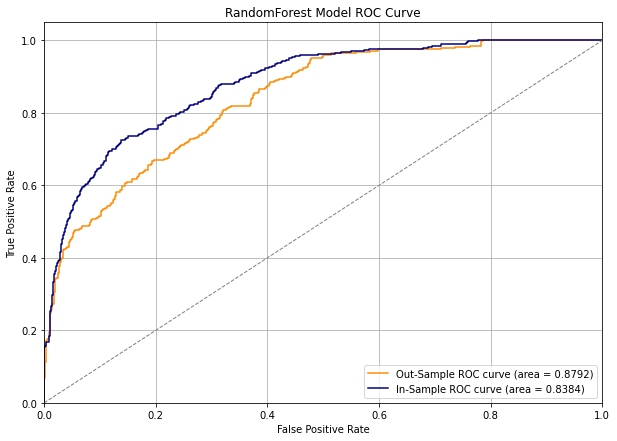

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))

plt.plot(
    out_sample_fpr, out_sample_tpr, color='darkorange', label='Out-Sample ROC curve (area = %0.4f)' % in_sample_roc_auc
)
plt.plot(
    in_sample_fpr, in_sample_tpr, color='navy', label='In-Sample ROC curve (area = %0.4f)' % out_sample_roc_auc
)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.grid()
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RandomForest Model ROC Curve')
plt.legend(loc="lower right")

plt.show()

## 8.4 Predicting the likelihood of marketing engagement with r